NAMES

In [1]:
import cv2 as cv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
matplotlib.rcParams['xtick.major.size'] = 0
matplotlib.rcParams['ytick.major.size'] = 0
matplotlib.rcParams['xtick.labelsize'] = 0
matplotlib.rcParams['ytick.labelsize'] = 0

In [3]:
def plot_side_by_side(first, second, input_name, output_name):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))
    ax1.imshow(cv.cvtColor(first, cv.COLOR_GRAY2RGB))
    ax2.imshow(cv.cvtColor(second, cv.COLOR_GRAY2RGB))
    ax1.set_title(input_name)
    ax2.set_title(output_name)
    plt.show()

In [4]:
def get_plot_connectedcomponents(gray_image):
    # n, labels, stats, _ = cv.connectedComponentsWithStats(img)
    # print(n, np.count_nonzero(np.array(labels)))
    ret, thresh = cv.threshold(gray_image, 127, 255, 0)
    im2, contours = cv.findContours(thresh, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    for c in contours:
       # calculate moments for each contour
       M = cv.moments(c)
       # calculate x, y coordinate of center
       if M["m00"] != 0:
           cX = int(M["m10"] / M["m00"])
           cY = int(M["m01"] / M["m00"])
       else:
           cX, cY = 0, 0
       cv.circle(img, (cX, cY), 5, (255, 255, 255), -1)
       cv.putText(img, "centroid", (cX - 25, cY - 25), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2)
    plot_side_by_side(img, img, 'input_name', 'output_name')

## 1) Dilation:

#### Problem 1:

In [5]:
square_circle_img = cv.imread("image2_folder/Square-circle.png", 0)

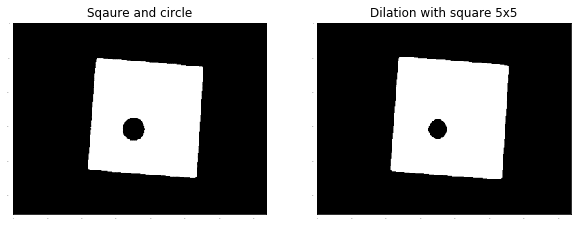

In [6]:
kernel_square_5x5 = np.ones((5, 5), np.uint8)
dilated_img_with_square = cv.dilate(square_circle_img, kernel_square_5x5, iterations = 1)
plot_side_by_side(square_circle_img, dilated_img_with_square, 'Sqaure and circle', 'Dilation with square 5x5')

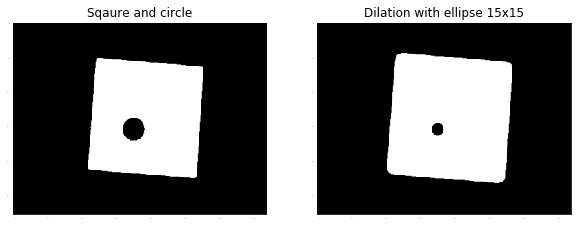

In [7]:
kernel_ellipse_15x15 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (15, 15))
dilated_img_with_ellipse = cv.dilate(square_circle_img, kernel_ellipse_15x15, iterations = 1)
plot_side_by_side(square_circle_img, dilated_img_with_ellipse, 'Sqaure and circle', 'Dilation with ellipse 15x15')

Explaination:


#### Problem 2:

In [8]:
cameraman_img = cv.imread("image2_folder/Cameraman.png", 0)

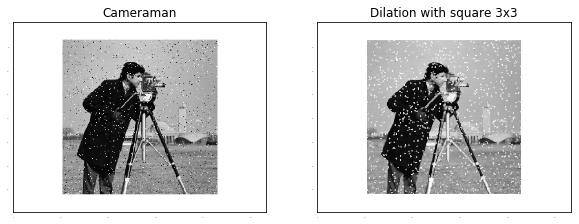

In [9]:
kernel_ellipse_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
dilated_img_with_ellipse = cv.dilate(cameraman_img, kernel_ellipse_3x3, iterations = 1)
plot_side_by_side(cameraman_img, dilated_img_with_ellipse, 'Cameraman', 'Dilation with square 3x3')

#### Problem 3:

In [10]:
lady_img = cv.imread("image2_folder/lady.png", 0)

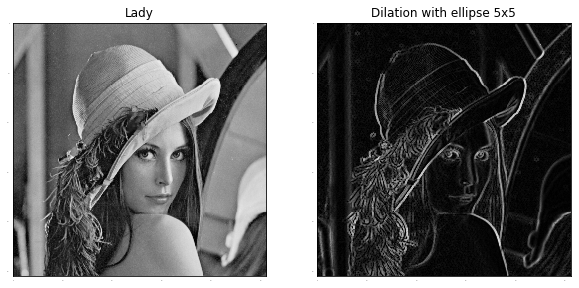

In [11]:
kernel_ellipse_5x5 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5, 5)) 
dilated_img_with_ellipse = cv.dilate(lady_img, kernel_ellipse_5x5, iterations = 1) - lady_img
plot_side_by_side(lady_img, dilated_img_with_ellipse, 'Lady', 'Dilation with ellipse 5x5')

## 2) Erosion:

#### Problem 4: 

In [12]:
square_circle_img = cv.imread("image2_folder/Square-circle.png", 0)

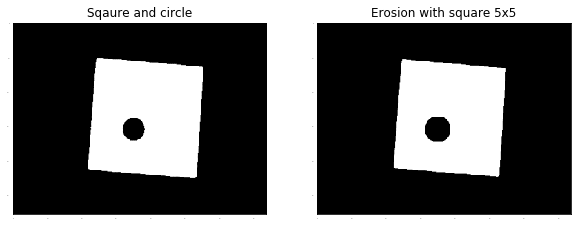

In [13]:
kernel_square_5x5 = np.ones((5, 5), np.uint8)
eroded_img_with_square = cv.erode(square_circle_img, kernel_square_5x5, iterations = 1)
plot_side_by_side(square_circle_img, eroded_img_with_square, 'Sqaure and circle', 'Erosion with square 5x5')

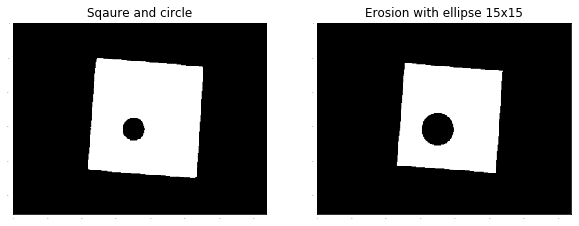

In [14]:
kernel_ellipse_15x15 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (15, 15))
eroded_img_with_ellipse = cv.erode(square_circle_img, kernel_ellipse_15x15, iterations = 1)
plot_side_by_side(square_circle_img, eroded_img_with_ellipse, 'Sqaure and circle', 'Erosion with ellipse 15x15')

#### Problem 5: 

In [15]:
square_circle_img = cv.imread("image2_folder/Circle.png", 0)

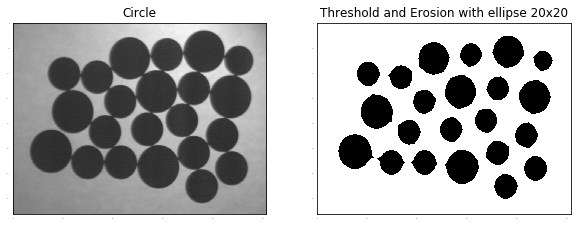

In [16]:
inverted_img = 255 - square_circle_img
ret, thresholded_square_circle_img = cv.threshold(inverted_img, 127, 255, cv.THRESH_BINARY)
kernel_ellipse_20x20 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (20, 20))
eroded_img_with_ellipse = 255 - cv.erode(thresholded_square_circle_img, kernel_ellipse_20x20, iterations = 1)
plot_side_by_side(square_circle_img, eroded_img_with_ellipse, 'Circle', 'Threshold and Erosion with ellipse 20x20')

#### Problem 6:

In [17]:
cameraman_img = cv.imread("image2_folder/Cameraman.png", 0)

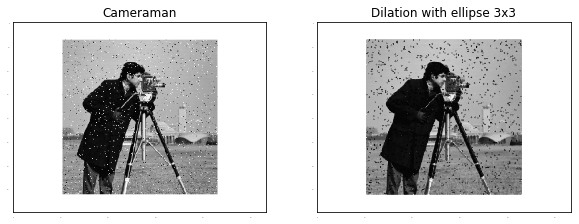

In [18]:
kernel_ellipse_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
eroded_img_with_ellipse = cv.erode(cameraman_img, kernel_ellipse_3x3, iterations = 1)
plot_side_by_side(cameraman_img, eroded_img_with_ellipse, 'Cameraman', 'Dilation with ellipse 3x3')

## 3) Opening and Closing:

**Problem 7:**

In [19]:
circle_and_lines_img = cv.imread("image2_folder/Circle_and_Lines.png", 0)

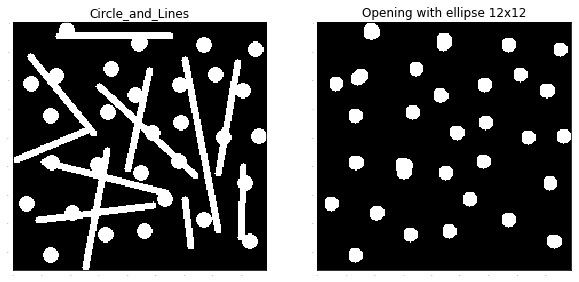

In [20]:
kernel_ellipse_12x12 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (12, 12))
circles_img = cv.morphologyEx(circle_and_lines_img, cv.MORPH_OPEN, kernel_ellipse_12x12)
plot_side_by_side(circle_and_lines_img, circles_img, 'Circle_and_Lines', 'Opening with ellipse 12x12')

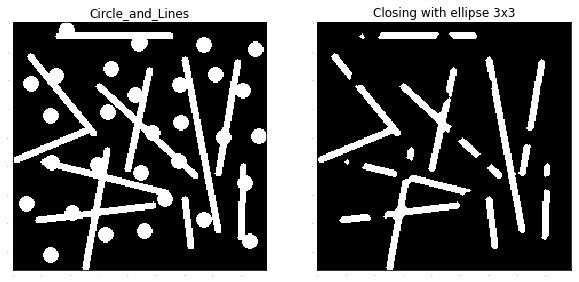

In [21]:
lines_img = circle_and_lines_img - circles_img
kernel_ellipse_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
lines_img = cv.morphologyEx(lines_img, cv.MORPH_OPEN, kernel_ellipse_3x3)
lines_img = cv.morphologyEx(lines_img, cv.MORPH_CLOSE, kernel_ellipse_3x3, iterations = 2)
plot_side_by_side(circle_and_lines_img, lines_img, 'Circle_and_Lines', 'Closing with ellipse 3x3')

No. of circles: 30


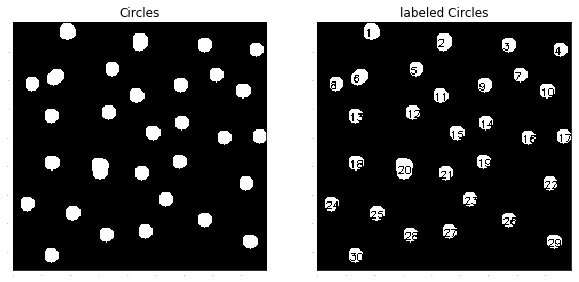

In [22]:
_, _, _, centers = cv.connectedComponentsWithStats(circles_img)
labeled_circles_img = np.array(circles_img)
for i in range (len(centers)):
    cv.putText(labeled_circles_img, str(i), (int(centers[i, 0] - 5), int(centers[i, 1]) + 5), cv.FONT_HERSHEY_SIMPLEX, 0.3,(0,0,0), thickness=1)
print('No. of circles:', len(centers) - 1)
plot_side_by_side(circles_img, labeled_circles_img, 'Circles', 'labeled Circles')

No. of lines: 19


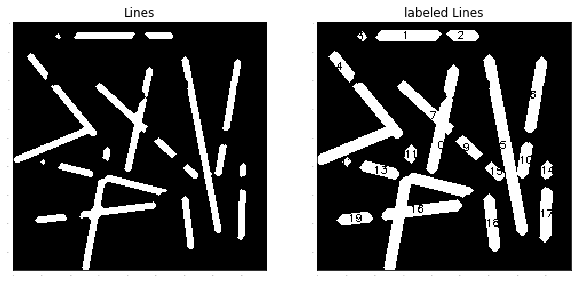

In [23]:
_, _, _, centers = cv.connectedComponentsWithStats(lines_img)
# Dilation to help showing labels
kernel_ellipse_3x3 = cv.getStructuringElement(cv.MORPH_ELLIPSE, (3, 3))
labeled_lines_img = cv.morphologyEx(lines_img, cv.MORPH_DILATE, kernel_ellipse_3x3, iterations=2)
for i in range (len(centers)):
    cv.putText(labeled_lines_img, str(i), (int(centers[i, 0]-5), int(centers[i, 1]+3)), cv.FONT_HERSHEY_SIMPLEX, 0.3,(0,0,0), thickness=1)
print('No. of lines:', len(centers) - 1)
plot_side_by_side(lines_img, labeled_lines_img, 'Lines', 'labeled Lines')

## 4) Practical:

**Problem 8:**